<a href="https://colab.research.google.com/github/Jeevan-NM/AirbnbBookings-DataAnalysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
#Mounting the drive to the colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing the required libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#The above line is used to get the visualization(graphs) in the working notebook

In [3]:
#Loading the data from the drive and storing it in pandas DataFrame (df)

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ALMABetter/Capstone Projects/EDA-Airbnb/Copy of Airbnb NYC 2019.csv')

In [4]:
#Getting the basic info about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#Lets check the shape of the given data
df.shape

(48895, 16)

We can see that the data contains 48895 rows and 16 columns.

In [6]:
#having a look at some rows of data to get a basic image of data
#First 5 rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
#last 5 rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [8]:
#Lets start to explore the data
#Lets check the different neighbourhood_group present

df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

There are totally 5 neighbourhood groups present in the given data

In [9]:
#Lets get the total number of unique neighbourhoods
df['neighbourhood'].nunique()

221

In [10]:
#Lets check the different number of neighbourhood present in each neighbourhood_group
df.groupby('neighbourhood_group')['neighbourhood'].nunique().reset_index()

,neighbourhood_group,neighbourhood
0,Bronx,48
1,Brooklyn,47
2,Manhattan,32
3,Queens,51
4,Staten Island,43


We can see that Queens contains the most number of neighbourhoods followed by Brooklyn. Manhattan contains the least number of neighbourhoods.

In [11]:
#Lets get the info about the different types of room present
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

There are three types of rooms present in the given data

In [12]:
#Lets check the number of hosts present
df['host_id'].nunique()

37457

In [13]:
#Getting info on how integral data is distributed
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


From the above data we can see that :
**Price** varies from 0-10000 with an average price of 152.72. The one which contains price as 0 doesn't seem to be a valid data as no one lists their property for free, so we would be replacing the price which contains 0 with an appropriate value like the mean ,median or mode based on how the data is distributed. 


Text(0.5, 1.0, 'Price Distribution')

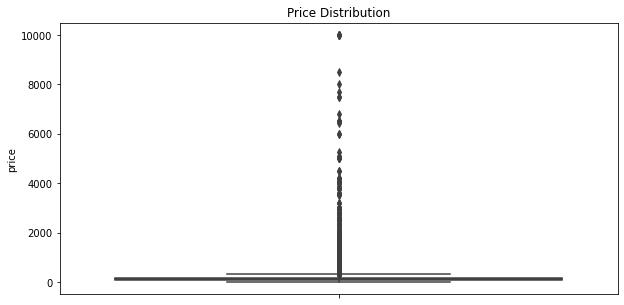

In [14]:
#Getting the info on how the price data is distributed
plt.rcParams['figure.figsize'] = (10, 5)
sns.boxplot(y=df['price']).set_title('Price Distribution')


From the above graph(box plot) we can see that there are a lot of outliers in the data i.e the data of the price column is skewed, so the option of using mean is ruled out, as outlier data points have significant impact on the mean.Now we are left out eith two options median and mode,since the data contains continuous values the best option for replacement would be median. So we would be using the median values to replace the price values containing zeroes.

In [15]:
#The below rows contains Price as 0 

df[df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [16]:
#Replacing the price value in the rows, which contains price as 0 with the median value of the price column.
med=df['price'].median()
df.loc[df['price']==0,'price']=med

In [17]:
#Now lets check the minimum price
df['price'].min()

10

From the above we can see that now the price column has a minimum of 10 which is reasonable.


In [18]:
#Now lets analyse how many missing values are present in each column

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

From the above we can see that the columns **last_review** and **reviews_per_month** contains the most number of null values. There are some null values present even in columns **name** and **host_name** 

In [19]:
#Setting the size for the graphs
plt.rcParams['figure.figsize'] = (12, 10)

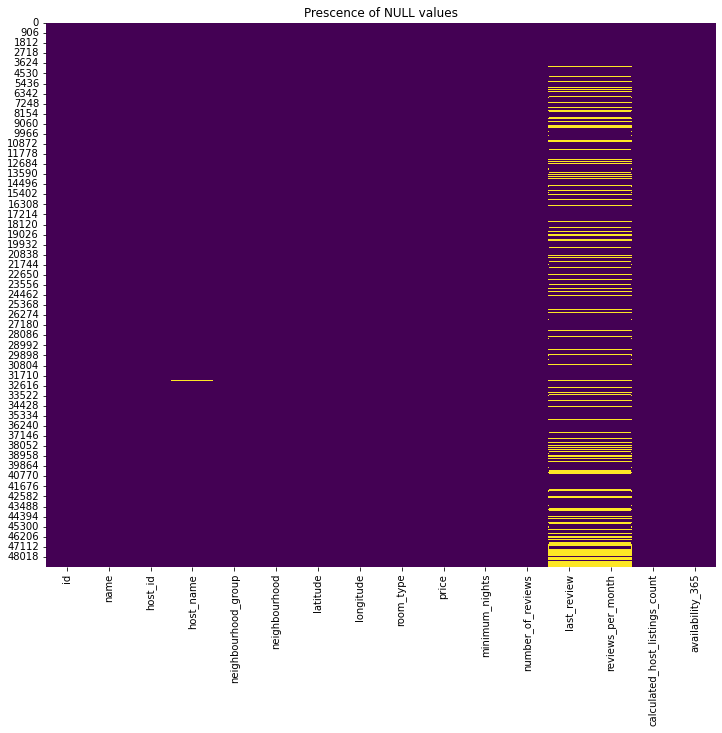

In [21]:
#Lets visualise the prescence of null values in each column
sns.heatmap(df.isnull(),cbar=False,cmap='viridis').set_title('Prescence of NULL values')
plt.ioff()

From the above visualisation we can see how null values are present in the data

In [22]:
#Handling NULL values
#1: name and host_name
df[['name']].value_counts().reset_index().rename(columns={0:'count'})

,name,count
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,Brooklyn Apartment,12
4,Private Room,11
...,...,...
47900,"Cozy home, away from home. 15 mins from downtown.",1
47901,"Cozy house , very quiet , clean room !",1
47902,Cozy house in Sunnyside gardens,1
47903,Cozy in Bedstuy,1


From the above we can see that there are 47905 different names , and it would inappropriate if we use any substitutions. So we would drop the column name, the same is the condition with the column host_name so we would even drop the column host_name .The reason why we are dropping the column and not the row which contains these null values is that there is a column, id for names and host_id for host_name and these columns do not contain any null values, so they can become substitute and hence columns name and host_name are not necessary. So we are dropping the columns name and host_name


In [23]:
#Dropping the columns name and host_name
df.drop(['name','host_name'],axis=1,inplace=True)

In [24]:
#Reviewing the updated data set
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


We can see from the above that columns **name** and **host_name** have been dropped

In [25]:
#importing the datetime module to convert string data type into date time data type
from datetime import datetime

In [26]:
#Converting last_review to datetime data type
df.loc[~df['last_review'].isnull(),'last_review'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))

0       2018-10-19
1       2019-05-21
3       2019-07-05
4       2018-11-19
5       2019-06-22
           ...    
48782   2019-07-07
48790   2019-07-07
48799   2019-07-07
48805   2019-07-07
48852   2019-07-08
Name: last_review, Length: 38843, dtype: datetime64[ns]

In [27]:
#handling null value
#3: last_review

df['last_review'].value_counts().reset_index()

,index,last_review
0,2019-06-23,1413
1,2019-07-01,1359
2,2019-06-30,1341
3,2019-06-24,875
4,2019-07-07,718
...,...,...
1759,2012-12-25,1
1760,2013-10-01,1
1761,2014-05-29,1
1762,2014-04-19,1


The column last_review contains the date on which a last review was made. The values of this column cannot be predicted on the basis of other columns as the last review can differ from place to place, the mode value of the column coud have been used i.e the most repeated value could have been used but this may not be appropriate as it is not a purely categorical data and even the last_review dates are distributed largely ,this may become inappropriate if we do so, so we would drop the column

In [28]:

#dropping the last_review column
df.drop('last_review',axis=1,inplace=True)

In [29]:
#Reviewing the updated data
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [30]:
#handling null value
#4:reviews_per_month
#Assuming that the null values of reviews_per_month as 0 reviews ,we will fill null values with 0 
#Replacing the null values with 0
df['reviews_per_month'].fillna(0,inplace=True)

In [31]:
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Now we can see that all the null values are handled and there are no other null values left.


In [32]:
#Lets start to get insights or information from the data
#The top 10 hosts who have listed their property more are
df['host_id'].value_counts().head(10).reset_index().rename(columns={'index':'host_id','host_id':'total_listings'})

,host_id,total_listings
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


In [33]:

#Now lets check how the average price varies for different room types
df_1=df.groupby(['room_type'])['price'].mean().reset_index()
df_1.head()

,room_type,price
0,Entire home/apt,211.802590
1,Private room,89.814208
2,Shared room,70.310345


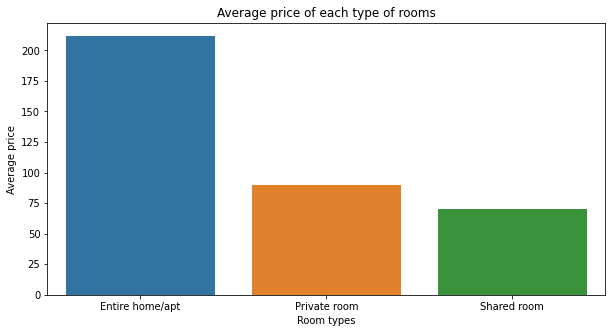

In [34]:
plt.rcParams['figure.figsize']=(10,5)
sns.barplot(data=df_1,x='room_type',y='price')
plt.title('Average price of each type of rooms')
plt.xlabel('Room types')
plt.ylabel('Average price')
plt.ioff()

The above barplot clearly shows that the average price for entire home/apt is the highest and shared rooms have the lowest average price.

In [35]:
#Now lets check how price varies in different neighbourhood_groups
df_2=df.groupby(['neighbourhood_group'])['price'].mean().reset_index()
df_2.head()

,neighbourhood_group,price
0,Bronx,87.593951
1,Brooklyn,124.430661
2,Manhattan,196.880707
3,Queens,99.517649
4,Staten Island,114.812332


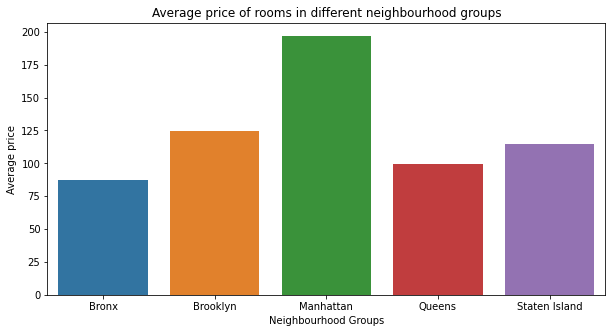

In [36]:
sns.barplot(x='neighbourhood_group',y='price',data=df_2)
plt.title('Average price of rooms in different neighbourhood groups')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Average price')
plt.ioff()

From the above graph we can see that the average price at Manhattan is the highest and is lowest at Bronx 

In [37]:
#Lets see how the average price varies for different room types in different neighbourhood groups
df_4=pd.DataFrame(df.groupby(['neighbourhood_group','room_type'])['price'].mean()).reset_index()
df_4.head()

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.950920
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.338634
4,Brooklyn,Private room,76.562870


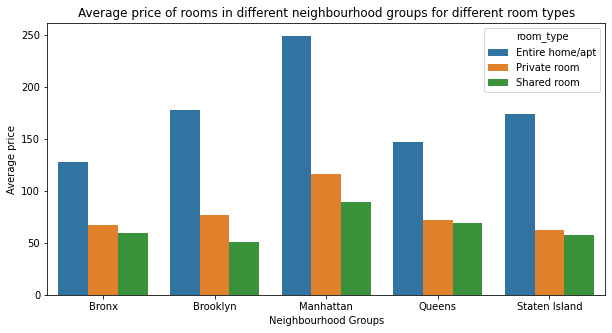

In [38]:
sns.barplot(data=df_4,x='neighbourhood_group',y='price',hue='room_type')
plt.title('Average price of rooms in different neighbourhood groups for different room types')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Average price')
plt.ioff()

The above graph shows the variation of average prices of each room type in different neighbourhood groups

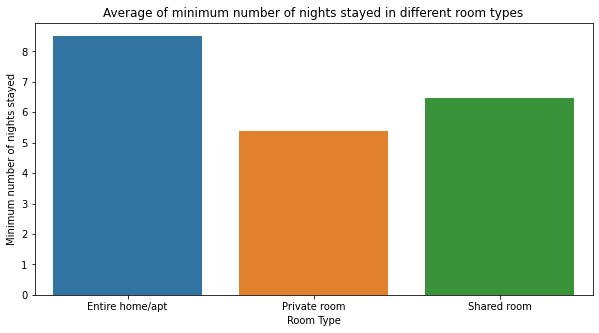

In [40]:
#Lets check the variation of minimum nights stayed with different type of rooms
sns.barplot(data=df.groupby('room_type')['minimum_nights'].mean().reset_index(),x='room_type',y='minimum_nights')
plt.title('Average of minimum number of nights stayed in different room types')
plt.xlabel('Room Type')
plt.ylabel('Minimum number of nights stayed')
plt.ioff()

From the above graph we can come to a conclusion that, people used to stay more in entire homes than any other type of rooms and they stayed less in private rooms.

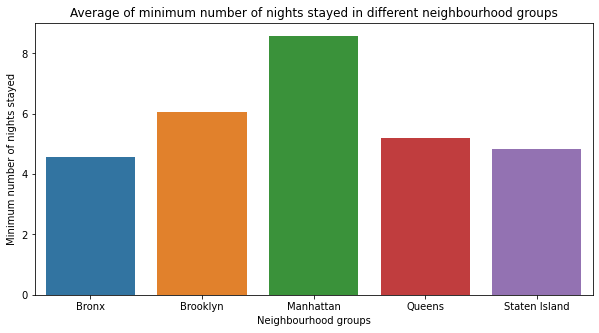

In [41]:
#Lets check the variation of minimum nights stayed with different neighbourhood groups
sns.barplot(data=df.groupby('neighbourhood_group')['minimum_nights'].mean().reset_index(),x='neighbourhood_group',y='minimum_nights')
plt.title('Average of minimum number of nights stayed in different neighbourhood groups')
plt.xlabel('Neighbourhood groups')
plt.ylabel('Minimum number of nights stayed')
plt.ioff()

From the above bar graph we can see that people stayed more in Manhattan and Brooklyn than any other neighbourhood groups.

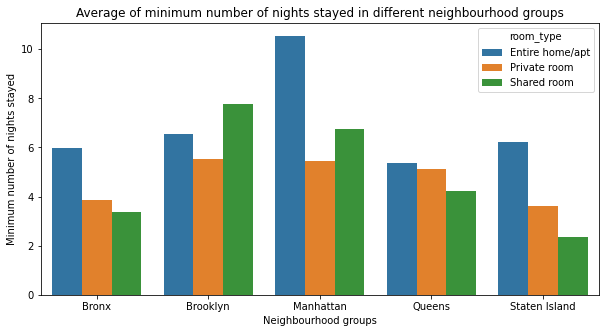

In [42]:
#Lets check the variation of minimum nights stayed with different neighbourhood groups and different room types
sns.barplot(data=df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].mean().reset_index(),x='neighbourhood_group',y='minimum_nights',hue='room_type')
plt.title('Average of minimum number of nights stayed in different neighbourhood groups')
plt.xlabel('Neighbourhood groups')
plt.ylabel('Minimum number of nights stayed')
plt.ioff()

We can see from the above that in Manhattan people stayed more in entire houses followed by shared rooms. In Brooklyn people preferred shared rooms over entire houses. In the other neighbourhood groups people preferred entire houses followed by private rooms.

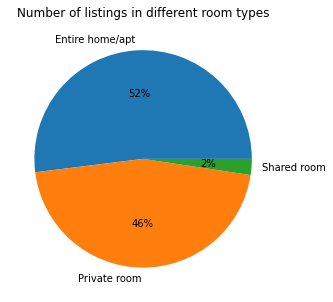

In [43]:
#Number of listings of different room types
df_8=df.groupby('room_type')['neighbourhood_group'].count().reset_index().rename(columns={'neighbourhood_group':'count'})
plt.pie(data=df_8,x='count',labels=['Entire home/apt','Private room','Shared room'],autopct='%.0f%%')
plt.title('Number of listings in different room types')
plt.ioff()

We can see from the above figure that entire homes occupy slightly more than half of the total listings i.e 52%, followed by private rooms which occupies 46% and at last is shared rooms which comprises only 2% of the entire listings. 

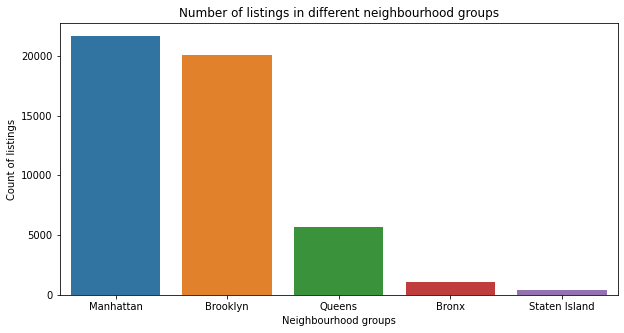

In [44]:
#Lets check which place has the most number of listings
plt.rcParams['figure.figsize']=(10,5)
df_5=df['neighbourhood_group'].value_counts().reset_index().rename(columns={'index':'neighbourhood_group','neighbourhood_group':'count'})
sns.barplot(data=df_5,x='neighbourhood_group',y='count')
plt.title('Number of listings in different neighbourhood groups')
plt.xlabel('Neighbourhood groups')
plt.ylabel('Count of listings')
plt.ioff()

The above bar graph shows that Manhattan has more number of host listings than any other neighbourhood groups and Staten Island has the least number of listings.

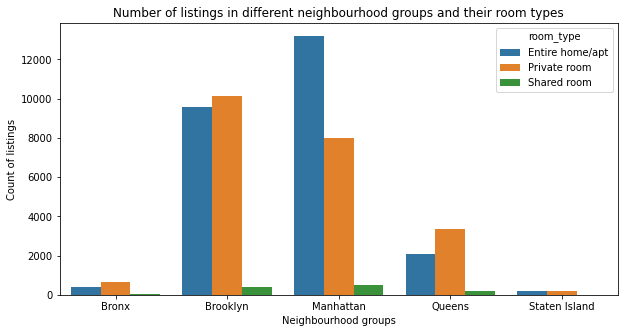

In [48]:
#Lets check which place has the most number of listings and their room types in different neighbourhood groups
df_7=pd.DataFrame(df.groupby(['neighbourhood_group','room_type'])['neighbourhood'].count().reset_index().rename(columns={'neighbourhood':'count'}))
sns.barplot(data=df_7,x='neighbourhood_group',y='count',hue='room_type')
plt.title('Number of listings in different neighbourhood groups and their room types')
plt.xlabel('Neighbourhood groups')
plt.ylabel('Count of listings')
plt.ioff()

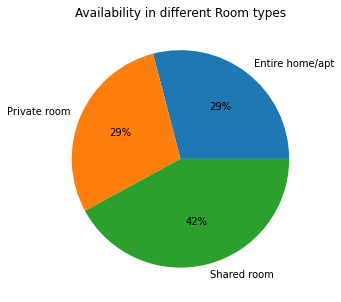

In [49]:
#Lets check the availability of rooms in different room types
plt.pie(data=pd.DataFrame(df.groupby('room_type')['availability_365'].mean()),x='availability_365',labels=['Entire home/apt','Private room','Shared room'],autopct='%.0f%%')
plt.title('Availability in different Room types')
plt.ioff()

Shared rooms have more availabilty than entire homes and private rooms.
The reason may be that as people prefer entire homes and private rooms over shared rooms. The demand is less for shared rooms making the avilability more.

Text(0.5, 1.0, 'Availability in different Neighbourhood groups')

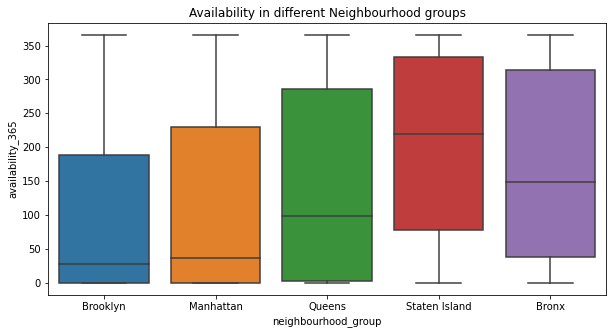

In [ ]:
#Lets check the availability of rooms in different neigbourhood groups
sns.boxplot(data=df,x='neighbourhood_group',y='availability_365')
plt.title('Availability in different Neighbourhood groups')

Brooklyn and Manhattan have the
least availability of rooms overall,
as low as 0 days.
Staten Island and Bronx has the
highest availability rate overall at
around 300 days.

We can see from the above that shared rooms have more availability and the room types have almost the percentage of availability. The reason may be, as people preffered entire home over shared rooms so the demand may be less for shared rooms making to more available through out the year. 

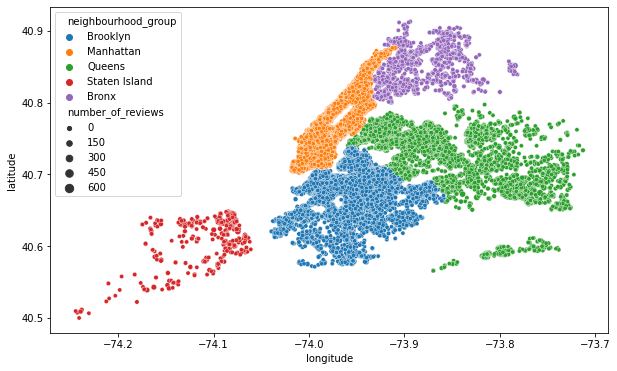

In [50]:
#now lets see how the rooms are scattered in different neighbourhood groups and the number of reviews in each group.
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df['neighbourhood_group'],size=df['number_of_reviews'])
plt.ioff()

From the above graph we get the information about the distribution of different rooms  in different neighbourhood groups,from the previous bar plot we had got the information that manhattan has the most number of listings,we can even see that Manhattan hasn't occupied much space when compared to other groups i.e from the previous analysis we had the info that Manhattan has the least number of neighbourhoods,so we can draw an information from this observation that Manhattan has a large amount of traffic than any other groups.

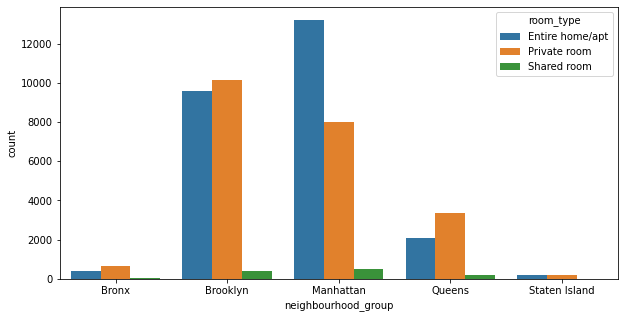

In [51]:
#Lets gather info about why Manhattan has the highest traffic
df_3=pd.DataFrame(df.groupby(['neighbourhood_group','room_type'])['room_type'].count()).rename(columns={'room_type':'count'}).reset_index()
sns.barplot(data=df_3,x='neighbourhood_group',y='count',hue='room_type')
plt.ioff()

From the above barplot we can see that Manhattan has the highest number of Entire home as room type, from the previous visualizations we had the information that people preffered to stay more in entire homes, fom these informations we can draw a conclusion that since Manhattan has more number of apartments (Entire house) for rents people preffered Manhattan more which may have lead to more traffic.
From this graph we can even see that the count of shared room type is nill when compared to entire house and private rooms.

In [52]:
#Now lets check the neighbourhoods with most number of listings
df_6 =df.groupby(['neighbourhood','neighbourhood_group'])[['id']].count().reset_index().rename(columns={'id':'count'}).sort_values(by='count', ascending=False).head(10)
df_6

,neighbourhood,neighbourhood_group,count
214,Williamsburg,Brooklyn,3920
13,Bedford-Stuyvesant,Brooklyn,3714
94,Harlem,Manhattan,2658
28,Bushwick,Brooklyn,2465
202,Upper West Side,Manhattan,1971
95,Hell's Kitchen,Manhattan,1958
64,East Village,Manhattan,1853
201,Upper East Side,Manhattan,1798
51,Crown Heights,Brooklyn,1564
127,Midtown,Manhattan,1545


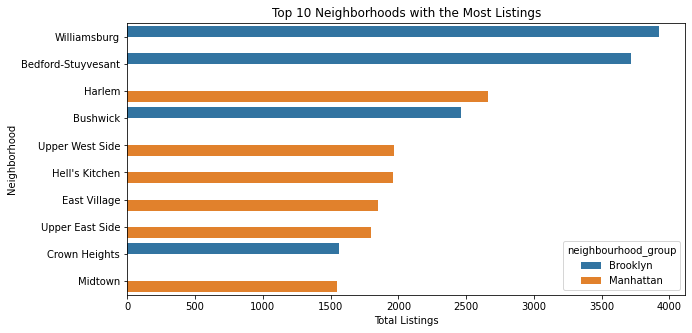

In [53]:
sns.barplot(x='count',y='neighbourhood',data=df_6,hue='neighbourhood_group')
plt.title("Top 10 Neighborhoods with the Most Listings")
plt.ylabel("Neighborhood")
plt.xlabel("Total Listings")
plt.ioff()

The top neighbourhood with most listing is Williamsburg in Brooklyn. The neighborhoods with the most listings are in Manhattan and Brooklyn which is understandable given that tourists are more likely to stay in those areas. 

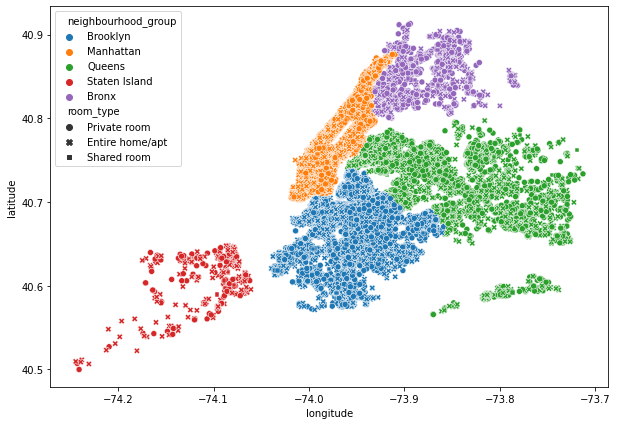

In [54]:
#Now lets see the distribution of different room types in different neighbourhood groups
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df['neighbourhood_group'],style=df['room_type'])
plt.ioff()

In [55]:
#Now lets see who has the maximum numberof listings and their details
df.loc[df['calculated_host_listings_count']==df['calculated_host_listings_count'].max(),['host_id','neighbourhood_group','room_type','calculated_host_listings_count']].head(1)

,host_id,neighbourhood_group,room_type,calculated_host_listings_count
38293,219517861,Manhattan,Entire home/apt,327


The person with host id **219517861** has the maximum number of listings.
We can see that this host offers room type of entire home or apartment, which is the one that has the maximum average price and people tend to stay more number of nights in this type of rooms. Since people stay for more number of nights the price may be higher in Manhattan, resulting in low price per night, so it may be a reason that this host has the maximum number of listing.

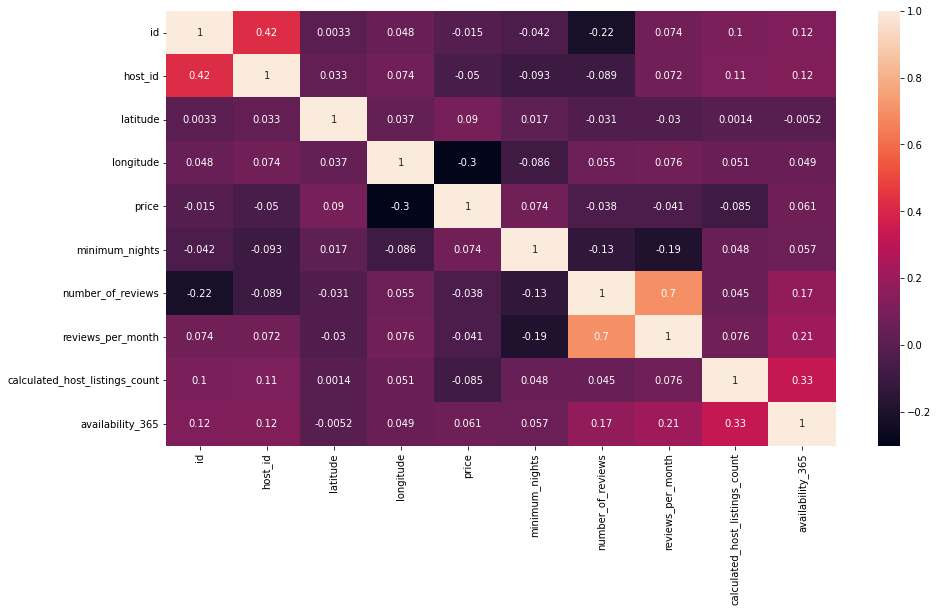

In [57]:
#Now lets see how each columns in the data co relates with one another
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.ioff()

The above heatmap doesnt show any major co related data, some of the observations that can be made are longitude and price are negatively co related to a noticeable extent, reviews per month and number of reviews are well related which is obviuos.

**Key Points:**

1.Manhattan has the highest number of listings and is the most expensive group to rent entire homes and private rooms.

2.Brooklyn has the second-highest number of listings and is the second most expensive group for rentals.

3.Manhattan and Brooklyn make up for 87% of listings available in NYC.
The Bronx is the most affordable group, while Staten Island has the lowest number of listings.

4.Listings in Manhattan and Brooklyn are less available throughout the year in comparison to the other groups.

5.Manhattan and Brooklyn have the highest number of minimum nights per stay.


6.The top 10 neighbourhoods with the most listings are located either in Manhattan or Brooklyn.





**Conclusion:**

This Airbnb ('AB_NYC_2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented.At the beginning we did some data cleaning,which included replacing null values,dropping unnecessary columns and replacing some values which seemed to be wrong.Then we took insights from the data as follows.First, we have found hosts that take good advantage of the Airbnb platform and provide the most listings.
We found that our top host has 327 listings.After that, we proceeded with analyzing how prices differed with different room types and in different neighbourhood groups. We also analyzed which type of rooms did people preffered the most to stay, and found out that people preffered mostly entire houses. Next, we put good use of our latitude and longitude columns and used to create a graph color-coded by the neighbourhood groups and shape coded by their availability.We even checked about how each column were co related with one another.Overall, we discovered a very good number of interesting relationships between features and explained each step of the process.